<a href="https://colab.research.google.com/github/ahnjongin/deeplearning/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_4%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST CNN

In [ ]:
#필요한 모듈 포함
import keras
from keras import models, layers
from keras import backend
from keras import datasets
import tensorflow as tf
from tensorflow import keras

In [ ]:
#학습인자
batch_size = 128 #학습 과정에서 히스토리 기록을 하는 단위
epochs = 10 #반복 학습할 횟수
num_classes = 10  #분류할 개수(숫자 0~9이므로 10)

In [ ]:
#mnist 데이터 로딩
mdata = keras.datasets.mnist.load_data()  #손글씨 데이터 로딩
train,test = mdata  #학습 데이터와 테스트 데이터로 분리
x_train, y_train = train  #학습 데이터를 독립변수와 종속 변수로 분리
x_test, y_test = test  #테스트 데이터를 독립변수와 종속 변수로 분리

In [ ]:
x_train.shape, y_train.shape  #학습 데이터의 구조 확인

((60000, 28, 28), (60000,))

0


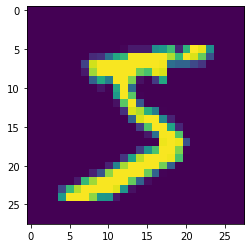

1


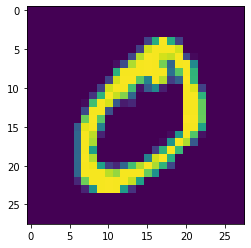

2


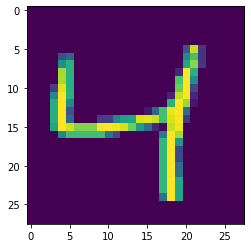

3


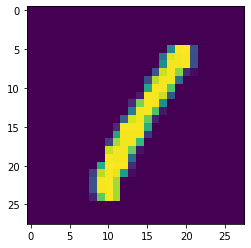

4


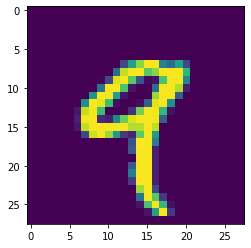

5


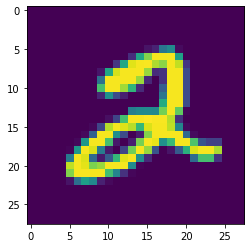

6


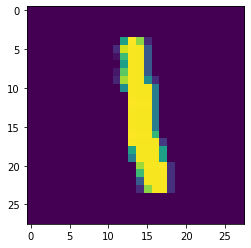

7


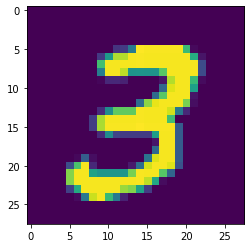

8


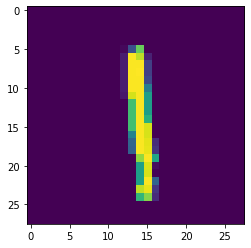

9


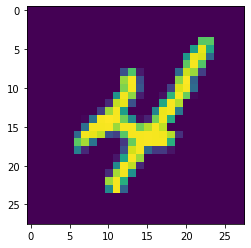

In [ ]:
import matplotlib.pyplot as plt
for i in range(10):
  print(i)
  plt.figure(figsize=(4,4))
  plt.imshow(x_train[i])
  plt.show()

In [ ]:
#데이터 정제화
x_train2=x_train.reshape(60000,28,28,1)  #하드코딩
x_train2.shape, x_train.shape

((60000, 28, 28, 1), (60000, 28, 28))

In [ ]:
img_rows, img_cols = x_test.shape[1:]
x_test2= x_test.reshape(x_test.shape[0],img_rows,img_cols,1)  #소프트코딩
input_shape=(img_rows,img_cols,1)
x_test2.shape, input_shape

((10000, 28, 28, 1), (28, 28, 1))

In [ ]:
x_test_dummy = x_test.reshape(-1,)
mv=max(x_test_dummy)
mv

255

In [ ]:
#독립변수의 값을 0~1.0 사이의 값으로 치환
x_train3= x_train2/mv
x_test3=x_test2/mv

In [ ]:
x_test_dummy2= x_train3.reshape(-1,)
mv2 = max(x_test_dummy2)
mv2

1.0

In [ ]:
y_train2=keras.utils.to_categorical(y_train,num_classes)
y_test2=keras.utils.to_categorical(y_test,num_classes)
y_train, y_train2

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32))

In [ ]:
x_test4 = x_test.reshape(-1,784)
x_train4= x_train3.reshape(-1,784)
x_train4.shape, y_train2.shape

((60000, 784), (60000, 10))

In [ ]:
#모델 생성
model = models.Sequential()

In [ ]:
#계층 쌓기
model.add(layers.Dense(100,activation='relu', input_shape=(784,)))
model.add(layers.Dense(28,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
#컴파일
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
x_train4.shape, y_train2.shape

((60000, 784), (60000, 10))

In [ ]:
#학습
model.fit(x_train4,y_train2,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 16s 2ms/step - loss: 0.4735 - accuracy: 0.8586
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1277 - accuracy: 0.9600
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0813 - accuracy: 0.9754
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0640 - accuracy: 0.9807
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0476 - accuracy: 0.9851
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0371 - accuracy: 0.9882
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0321 - accuracy: 0.9896
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0274 - accuracy: 0.9911
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0242 - accuracy: 0.9917
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.01

In [ ]:
x_train3.shape, x_test3.shape #CNN에서 사용할 데이터 구조, DNN에서 사용할 데이터 구조

((60000, 28, 28, 1), (10000, 28, 28, 1))

#CNN

In [ ]:
#모델 생성
modelc = models.Sequential()

In [ ]:
#CNN 계층 쌓기
modelc.add(layers.Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=input_shape))  #원본이미지와 커널 사이에 컨벌루션 연산을 통해 특성 이미지를 추추하여라
modelc.add(layers.Conv2D(64,(3,3),activation="relu"))
modelc.add(layers.MaxPooling2D(pool_size=(2,2)))  #인접한 2x2쉘에 있는 값중에 최대값만 사용(독립변수 개수가 1/4로 줄여지는 효과)
modelc.add(layers.Dropout(0.25))  #은닉층에 독립변수의 개수를 25%로 버려서 학습하세요.
modelc.add(layers.Flatten())  #평면 혹은 입체 데이터 구조를 1차원 데이터로 구조 변경(DNN에 독립변수는 1차원이어야 함)
#DNN 계층 쌓기
modelc.add(layers.Dense(128,activation='relu'))
modelc.add(layers.Dropout(0.5))  #은닉층에 독립 변수를 50%로 버려서 학습하세요
modelc.add(layers.Dense(num_classes, activation='softmax')) 


In [ ]:
#학습 가능한 모델로 만들기 - 컴파일
modelc.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [ ]:
#학습
hist = modelc.fit(x_train3,y_train2,batch_size= batch_size, epochs=epochs)

Epoch 1/10
469/469 [==============================] - 8s 8ms/step - loss: 0.4825 - accuracy: 0.8488
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0908 - accuracy: 0.9723
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0655 - accuracy: 0.9800
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0501 - accuracy: 0.9850
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0418 - accuracy: 0.9877
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0382 - accuracy: 0.9879
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0346 - accuracy: 0.9887
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0277 - accuracy: 0.9914
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0280 - accuracy: 0.9910
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0261 - accuracy: 0.9913

In [ ]:
#평가
score= modelc.evaluate(x_test3, y_test2)
score

313/313 [==============================] - 2s 3ms/step - loss: 2.3031 - accuracy: 0.0949


[2.3014872074127197, 0.09830000251531601]

In [ ]:
score[0] #loss

2.3014872074127197

In [ ]:
score[1]  #accuracy

0.09830000251531601

In [ ]:
hist.history['loss']

[0.2382890284061432,
 0.08653831481933594,
 0.06438110768795013,
 0.051447223871946335,
 0.04227501153945923,
 0.038305118680000305,
 0.033437877893447876,
 0.02970747835934162,
 0.02711956948041916,
 0.025037730112671852]

In [ ]:
hist.history['accuracy']

[0.9279999732971191,
 0.9737499952316284,
 0.9807000160217285,
 0.9843500256538391,
 0.987500011920929,
 0.987500011920929,
 0.9893666505813599,
 0.9906666874885559,
 0.991266667842865,
 0.9916166663169861]

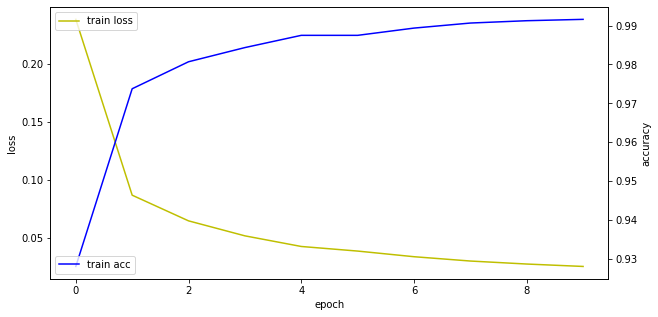

In [ ]:
fig,loss_ax= plt.subplots(figsize=(10,5))
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.plot(hist.history['accuracy'],'b', label='train acc')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

#Fashion mnist CNN

In [ ]:
#모듈 임포트
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Fashion 데이터 로딩
fdata = keras.datasets.fashion_mnist.load_data()
fdata

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
#Fashion 데이터를 학습 데이터와 테스트 데이터로 분리
train_data, test_data = fdata
train_data

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [ ]:
#학습 데이터를 독립변수와 종속 변수로 분리
fx_train,fy_train = train_data
fx_train.shape, fy_train.shape

((60000, 28, 28), (60000,))

In [ ]:
#테스트 데이터를 독립 변수와 종속 변수로 분리
fx_test, fy_test = test_data
fx_test.shape, fy_test.shape

((10000, 28, 28), (10000,))

0


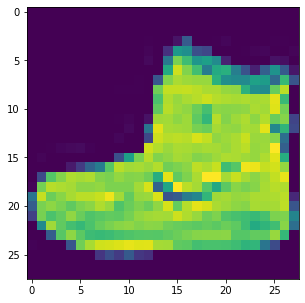

1


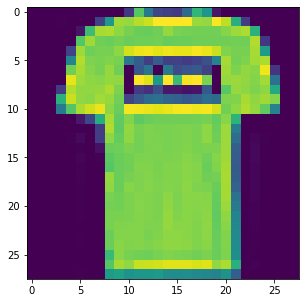

2


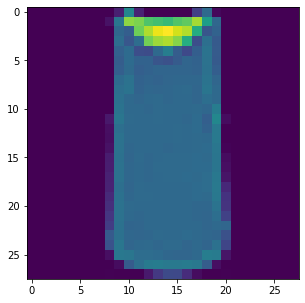

3


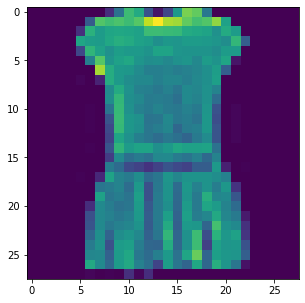

4


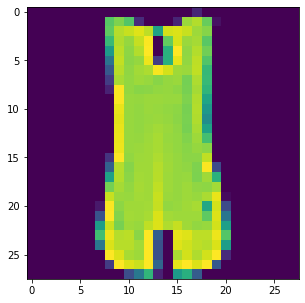

5


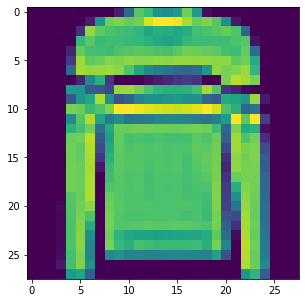

6


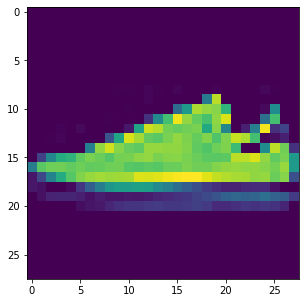

7


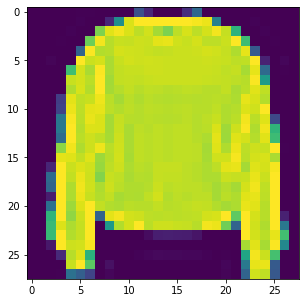

8


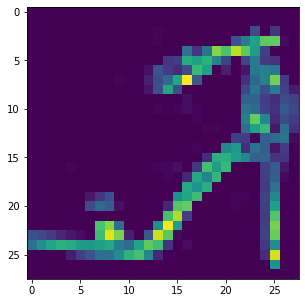

9


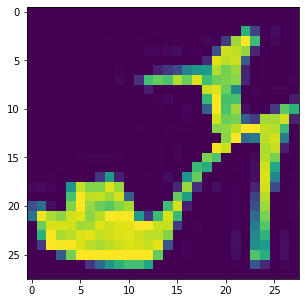

In [ ]:
#학습 데이터의 독립 변수 10개
for index in range(10):
  print(index)
  plt.figure(figsize=(5,5))
  plt.imshow(fx_train[index])
  plt.show()

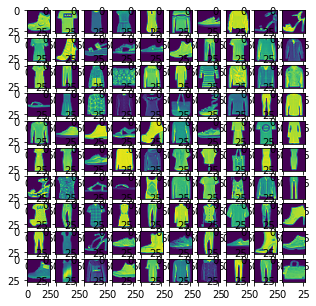

In [ ]:
#학습 데이터의 독립 변수 100개를 도면에 표시
plt.figure(figsize=(5,5))
for index in range(100):
  plt.subplot(10,10,index+1)
  plt.imshow(fx_train[index])
plt.show()

In [ ]:
#Fashion MNist의 클래스
class_name = ['T-shirt','Trouser', 'Pullover', 'Dress', 'Coat', "Sandal","Shirt","Sneaker","Bag", "Ankle boot"]
fy_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
fy_train[0], y_train[0], y_train2[0]

(9, 5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

DNN

In [ ]:
model=keras.Sequential(
    [
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(128,activation='relu'),
     keras.layers.Dense(28,activation='relu'),
     keras.layers.Dense(10,activation='softmax')
    ]
)

In [ ]:
#모델을 학습할 수 있게 컴파일
#model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
#분류로 해결할 문제를 회귀로 해결하기 위해 y값을 categorical한 데이터로 변형하여 학습해야함
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#분류로 해결할 문제를 회귀로 해결하기 위해 y값을 categorical한 데이터로 변형하지 않고 학습할 수 있음


In [ ]:
#학습
model.fit(fx_train, fy_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9121 - accuracy: 0.5097
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0422 - accuracy: 0.5820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8219 - accuracy: 0.6734
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6957 - accuracy: 0.7204
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6301 - accuracy: 0.7378
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5823 - accuracy: 0.7620
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5131 - accuracy: 0.8092
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4756 - accuracy: 0.8307
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4426 - accuracy: 0.8498
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.419

In [ ]:
score=model.evaluate(fx_test,fy_test)
score

313/313 [==============================] - 1s 2ms/step - loss: 0.4676 - accuracy: 0.8503


[0.46759024262428284, 0.8503000140190125]

CNN


In [ ]:
#모델 임포트
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cfdata = keras.datasets.fashion_mnist.load_data()

In [ ]:
(cf_xtrain, cf_ytrain),(cf_xtest, cf_ytest)= cfdata

In [ ]:
cf_xtrain = cf_xtrain/255
cf_xtest = cf_xtest/255.0
cf_xtrain.shape, cf_xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
cf_xtrain = cf_xtrain.reshape(-1,28,28,1)
cf_xtest = cf_xtest.reshape(-1,28,28,1)
cf_xtrain.shape, cf_xtest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
cf_ytrain = keras.utils.to_categorical(cf_ytrain, num_classes=10)
cf_ytest = keras.utils.to_categorical(cf_ytest, num_classes=10)
cf_ytrain[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
#CNN 모델 생성 및 계층 싸히
#1. 모델 생성
modelcf=keras.Sequential()
#2. CNN
#modelcf.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),input_shape=(28,28,1),activation="relu"))
#modelcf.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#modelcf.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
#modelcf.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#modelcf.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
#modelcf.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
#modelcf.add(keras.layers.Flatten())
modelcf.add(keras.layers.Conv2D(10,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
modelcf.add(keras.layers.MaxPooling2D(2,2))
modelcf.add(keras.layers.Flatten())
modelcf.add(keras.layers.Dense(100,activation='relu'))
modelcf.add(keras.layers.Dense(10,activation='softmax'))
#3. 계층 쌓기
#modelcf.add(keras.layers.Dense(100,activation='relu'))
#modelcf.add(keras.layers.Dense(28,activation='relu'))


In [ ]:
modelcf.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#컴파일 한 모델이 어떠한 구조인지 확인해 보자
modelcf.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               196100    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#학습
modelcf.fit(cf_xtrain,cf_ytrain, epochs=30,batch_size=128)

Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 0.2329 - accuracy: 0.9134
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2312 - accuracy: 0.9147
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2305 - accuracy: 0.9155
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2310 - accuracy: 0.9143
Epoch 5/30
469/469 [==============================] - 2s 3ms/step - loss: 0.2279 - accuracy: 0.9161
Epoch 6/30
469/469 [==============================] - 2s 3ms/step - loss: 0.2278 - accuracy: 0.9162
Epoch 7/30
469/469 [==============================] - 2s 3ms/step - loss: 0.2255 - accuracy: 0.9164
Epoch 8/30
469/469 [==============================] - 2s 3ms/step - loss: 0.2253 - accuracy: 0.9168
Epoch 9/30
469/469 [==============================] - 2s 3ms/step - loss: 0.2228 - accuracy: 0.9180
Epoch 10/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2219 - accuracy: 0.9174

In [ ]:
from keras import backend
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#cifar10 데이터 로딩
(tr_x, tr_y),(te_x, te_y)= cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
tr_x.shape, tr_y.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
tr_x2 = tr_x.reshape(-1,)
mv = max(tr_x2)
mv

255

In [ ]:
tr_x = tr_x/255.0
te_x=te_x/255.0

In [ ]:
tr_y = np_utils.to_categorical(tr_y,10)
te_y = np_utils.to_categorical(te_y,10)
tr_y[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
def CNN(in_shape):
  model = Sequential()
  model.add(Conv2D(32,kernel_size=(3,3),input_shape=in_shape, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  return model

In [ ]:
model = CNN(in_shape=(32,32,3))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               3686912   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 3,692,938
Trainable params: 3,692,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(tr_x, tr_y, batch_size=128, epochs=15)

Epoch 1/15
391/391 [==============================] - 2s 6ms/step - loss: 0.1031 - accuracy: 0.9738
Epoch 2/15
391/391 [==============================] - 2s 6ms/step - loss: 0.0854 - accuracy: 0.9798
Epoch 3/15
391/391 [==============================] - 2s 6ms/step - loss: 0.0765 - accuracy: 0.9813
Epoch 4/15
391/391 [==============================] - 2s 6ms/step - loss: 0.0676 - accuracy: 0.9825
Epoch 5/15
391/391 [==============================] - 2s 6ms/step - loss: 0.0690 - accuracy: 0.9815
Epoch 6/15
391/391 [==============================] - 2s 6ms/step - loss: 0.0616 - accuracy: 0.9829
Epoch 7/15
391/391 [==============================] - 2s 6ms/step - loss: 0.0586 - accuracy: 0.9838
Epoch 8/15
391/391 [==============================] - 2s 6ms/step - loss: 0.0335 - accuracy: 0.9926
Epoch 9/15
391/391 [==============================] - 2s 6ms/step - loss: 0.0339 - accuracy: 0.9917
Epoch 10/15
391/391 [==============================] - 2s 6ms/step - loss: 0.0409 - accuracy: 0.9888